<a href="https://colab.research.google.com/github/eajaimes/Bonificacion/blob/main/Copia_de_PRIMER_TRABAJO_CABLEADAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
"""
@authores: Maria Celeste Zuluaga Giraldo - Estefanny Alejandra Jaimes León.
"""
import numpy as np
import matplotlib.pyplot as plt
import random
import statistics


cantidad = int(input("Ingrese la longitud de bits de su arreglo: "))
arreglo = []
for i in range(cantidad):
    valor_aleatorio = random.randrange(0, 2) #Aquí generamos los valores aleatorios entre 0 y 1
    arreglo.append(valor_aleatorio)

arreglo2 = [1, 0, 0, 1, 1] #este vector lo damos fijo para posteriormente hacer lo del XOR
print("Su vector de bits es:",arreglo)

Ingrese la longitud de bits de su arreglo: 5
Su vector de bits es: [0, 1, 0, 0, 1]


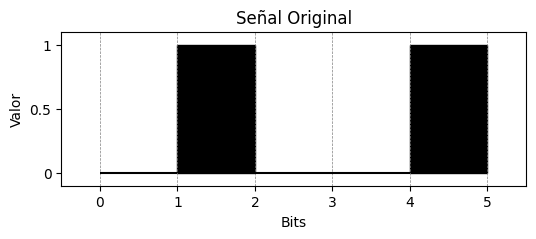

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(cantidad + 1, 2))
for i in range(len(arreglo) + 2):
    ax.axvline(x=i, color='gray', linestyle='--', linewidth=0.5)
for i, bit in enumerate(arreglo):
    if bit == 1:
        ax.add_patch(plt.Rectangle((i, 0), 1, 1, color='black'))
    else:
        ax.hlines(0, i, i + 1, color='black')
ax.set_title('Señal Original')
ax.set_xlabel('Bits')
ax.set_ylabel('Valor')

# Configurar la cuadrícula en el eje y
ax.set_yticks([0, 0.5, 1])
ax.set_yticklabels([0, 0.5, 1])
# Mostrar el gráfico
plt.xlim(-0.5, len(arreglo) + 0.5)
plt.ylim(-0.1, 1.1)
plt.show()


In [ ]:
arregloXOR = []
for a in arreglo:
    for b in arreglo2:
        resultado_xor = np.logical_xor(a, b)
        arregloXOR.append(resultado_xor)

tamaño = len(arregloXOR)
print("Vector resultanter XOR",arregloXOR)
print("El tamaño del vector es:", tamaño)

Vector resultanter XOR [True, False, False, True, True, False, True, True, False, False, True, False, False, True, True, True, False, False, True, True, False, True, True, False, False]
El tamaño del vector es: 25


In [ ]:
for i in range(len(arregloXOR)):
  if(arregloXOR[i] == True):
    arregloXOR[i] = 1
  if(arregloXOR[i] == False):
    arregloXOR[i] = 0
print("Vector resultanter XOR",arregloXOR)

Vector resultanter XOR [1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0]


In [ ]:
#vamos agregarle el valor DC, en caso de que el bit sea 1 se le agrega un 2 y si es un 0 se le agrega un 1
# true 1; false 0
for i in range(len(arregloXOR)): #Agregamos nivel dc
    if(arregloXOR[i] == True): #Si 1 = 2 dc
        arregloXOR[i] = 2
    if(arregloXOR[i] == False): #si 0 = 1 dc
        arregloXOR[i] = 1
tamaño3 = len(arregloXOR)
print("Vector con nivel Dc agregado",arregloXOR)
print("El tamaño del vector es",tamaño3)

Vector con nivel Dc agregado [2, 1, 1, 2, 2, 1, 2, 2, 1, 1, 2, 1, 1, 2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 1, 1]
El tamaño del vector es 25


In [ ]:
vector_rui = []  # Creamos un vector de ruido
#elegimos que el 50% tuviera un ruido de 3V y el otro 50% un ruido de 7V

for i in range(len(arreglo) * len(arreglo2)):
    if i < len(arreglo) * len(arreglo2) * 0.5:  #  50% = 3 voltios
        vector_rui.append(3)
    else:  #  50% = 7 voltios
        vector_rui.append(7)

print("Vector señal de ruido:",vector_rui)

Vector señal de ruido: [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7]


In [ ]:
suma_s_entrada = []
suma_s_entrada = np.add(arregloXOR,vector_rui); #sumamos los ruidos
print("Vector señal a la entrada del receptor ",suma_s_entrada)

Vector señal a la entrada del receptor  [5 4 4 5 5 4 5 5 4 4 5 4 4 9 9 9 8 8 9 9 8 9 9 8 8]


In [ ]:
#Hard Decision
# Calculamos el criterio de hard decision, con la operacion del valor maximo + el minimo dividio en 2.
h_d = (suma_s_entrada.max() + suma_s_entrada.min()) / 2
print("Valor de criterio del Hard decision:",h_d)

Valor de criterio del Hard decision: 6.5


In [ ]:
#Señal resultado del aplicar hard decision
#si el resultado de la hd es mayor a h_d es 1, sino es 0.
res_hd = []
for i in range(len(suma_s_entrada)):
  if(suma_s_entrada[i] >= h_d):
    res_hd.append(1)
  else:
    res_hd.append(0)
print("Señal resultado de aplicar hard decision:",res_hd)

Señal resultado de aplicar hard decision: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [ ]:
#Volvemos a codificar en el receptor y agrupamos en grupos de 5
grupo = np.reshape(res_hd,(len(arreglo),5))
print(grupo)

[[0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]


In [ ]:
#SEÑAL RECUPERADA
vec_mo = []
new_mo = []
for i in range(len(grupo)):
  grupoi = grupo[i]
  vec_mo.append(np.logical_xor(arreglo2,grupo[i]))
  moda = statistics.mode(vec_mo[i])
  new_mo.append(moda)
print(new_mo)

[True, True, False, False, False]


In [ ]:
#Convertimos a entero para poder realizar las operaciones correspondientes
for i in range(len(new_mo)):
  if(new_mo[i] == True):
    new_mo[i] = 1
  if(new_mo[i] == False):
    new_mo[i] = 0
print("Señal recuperada:",new_mo)

Señal recuperada: [1, 1, 0, 0, 0]


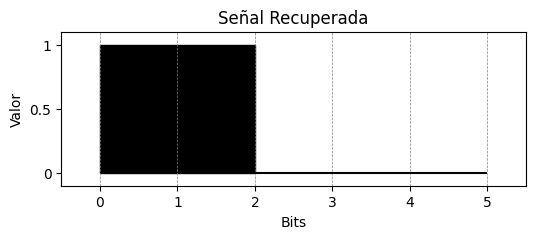

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(cantidad + 1, 2))
for i in range(len(arreglo) + 2):
    ax.axvline(x=i, color='gray', linestyle='--', linewidth=0.5)
for i, bit in enumerate(new_mo):
    if bit == 1:
        ax.add_patch(plt.Rectangle((i, 0), 1, 1, color='black'))
    else:
        ax.hlines(0, i, i + 1, color='black')
ax.set_title('Señal Recuperada')
ax.set_xlabel('Bits')
ax.set_ylabel('Valor')

# Configurar la cuadrícula en el eje y
ax.set_yticks([0, 0.5, 1])
ax.set_yticklabels([0, 0.5, 1])
# Mostrar el gráfico
plt.xlim(-0.5, len(arreglo) + 0.5)
plt.ylim(-0.1, 1.1)
plt.show()




In [ ]:
#BER
errores = sum(1 for x, y in zip(new_mo, arreglo) if x != y)
tasa_error = errores / len(arreglo)

print(f"La tasa de error es: {tasa_error}")

La tasa de error es: 0.4


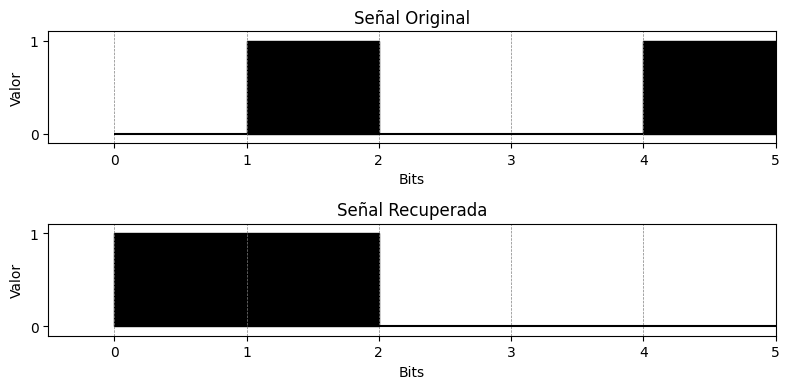

In [ ]:
import matplotlib.pyplot as plt
import random


fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 4))

for ax in [ax1, ax2]:
    for i in range(len(arreglo) + 1):
        ax.axvline(x=i, color='gray', linestyle='--', linewidth=0.5)

for i, bit in enumerate(arreglo):
    if bit == 1:
        ax1.add_patch(plt.Rectangle((i, 0), 1, 1, color='black'))
    else:
        ax1.hlines(0, i, i + 1, color='black')
for i, bit in enumerate(new_mo):
    if bit == 1:
        ax2.add_patch(plt.Rectangle((i, 0), 1, 1, color='black'))
    else:
        ax2.hlines(0, i, i + 1, color='black')

ax1.set_title('Señal Original')
ax1.set_xlabel('Bits')
ax1.set_ylabel('Valor')
ax2.set_title('Señal Recuperada')
ax2.set_xlabel('Bits')
ax2.set_ylabel('Valor')

for ax in [ax1, ax2]:
    ax.set_yticks([0, 1])
    ax.set_yticklabels([0, 1])

ax1.set_xlim(-0.5, len(arreglo))
ax2.set_xlim(-0.5, len(new_mo))

ax1.set_ylim(-0.1, 1.1)
ax2.set_ylim(-0.1, 1.1)

plt.tight_layout()
plt.show()

